# Visualizing Flight Data
In this project, we'll be working with flight data from the [openflights website](https://openflights.org/data.html). Here's a breakdown of the files we'll be working with and the most pertinent columns from each dataset:

- airlines.csv - data on each airline.
    - country - where the airline is headquartered.
    - active - if the airline is still active.
- airports.csv - data on each airport.
    - name - name of the airport.
    - city - city the airport is located.
    - country - country the airport is located.
    - code - unique airport code.
    - latitude - latitude value.
    - longitude - longitude value.
- routes.csv - data on each flight route.
    - airline - airline for the route.
    - source - starting city for the route.
    - dest - destination city for the route.

In [1]:
import pandas as pd
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')
routes = pd.read_csv('routes.csv')

print('Airlines:\n', airlines.head(2))
print('\nAirports:\n', airports.head(2))
print('\nRoutes:\n', routes.head(2))

Airlines:
    id            name alias iata icao callsign        country active
0   1  Private flight    \N    -  NaN      NaN            NaN      Y
1   2     135 Airways    \N  NaN  GNL  GENERAL  United States      N

Airports:
    id    name    city           country code  icao  latitude   longitude  \
0   1  Goroka  Goroka  Papua New Guinea  GKA  AYGA -6.081689  145.391881   
1   2  Madang  Madang  Papua New Guinea  MAG  AYMD -5.207083  145.788700   

   altitude  offset dst              timezone  
0      5282    10.0   U  Pacific/Port_Moresby  
1        20    10.0   U  Pacific/Port_Moresby  

Routes:
   airline airline_id source source_id dest dest_id codeshare  stops equipment
0      2B        410    AER      2965  KZN    2990       NaN      0       CR2
1      2B        410    ASF      2966  KZN    2990       NaN      0       CR2


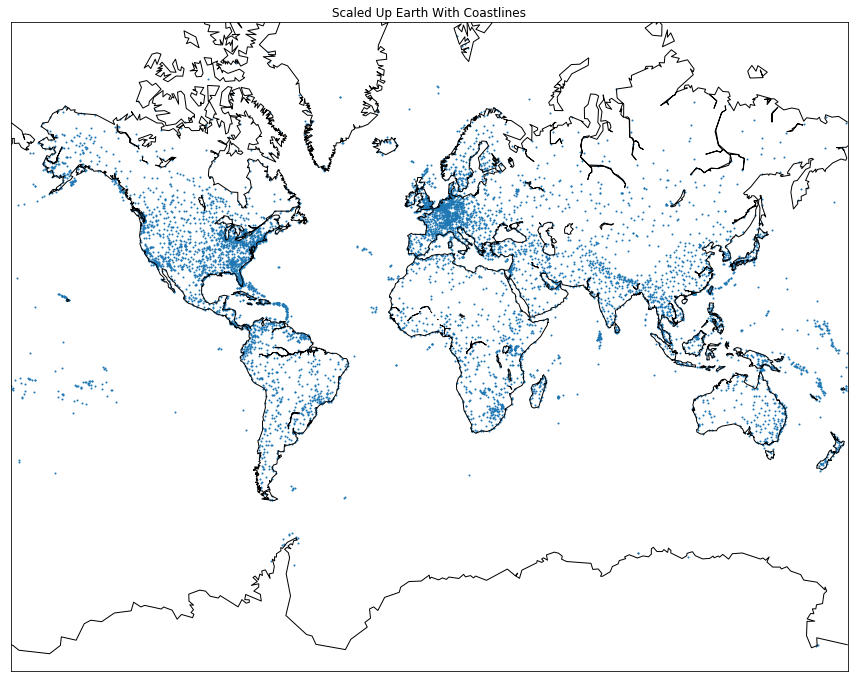

In [2]:
import geopandas
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

#create a figure for scatter plot
fig, ax = plt.subplots(figsize=(15,20))
plt.title('Scaled Up Earth With Coastlines')

#create a new basemap instance
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)

# convert spherical coordinates to Cartesian coordinates
longitudes = airports['longitude'].tolist()
latitudes = airports['latitude'].tolist()
x,y = m(longitudes, latitudes)

#create a scatter plot
m.scatter(x, y, s=1)
m.drawcoastlines()
plt.show()

## Drawing Great Circles
To better understand the flight routes, we can draw great circles to connect starting and ending locations on a map. To make things easier, there is a CSV file called geo_routes.csv that contains the latitude and longitude values corresponding to the source and destination airports for each route. 

In [3]:
geo_routes = pd.read_csv('geo_routes.csv')
geo_routes.info()
geo_routes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67428 entries, 0 to 67427
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   airline    67428 non-null  object 
 1   source     67428 non-null  object 
 2   dest       67428 non-null  object 
 3   equipment  67410 non-null  object 
 4   start_lon  67428 non-null  float64
 5   end_lon    67428 non-null  float64
 6   start_lat  67428 non-null  float64
 7   end_lat    67428 non-null  float64
dtypes: float64(4), object(4)
memory usage: 4.1+ MB


,airline,source,dest,equipment,start_lon,end_lon,start_lat,end_lat
0,2B,AER,KZN,CR2,39.956589,49.278728,43.449928,55.606186
1,2B,ASF,KZN,CR2,48.006278,49.278728,46.283333,55.606186
2,2B,ASF,MRV,CR2,48.006278,43.081889,46.283333,44.225072
3,2B,CEK,KZN,CR2,61.503333,49.278728,55.305836,55.606186
4,2B,CEK,OVB,CR2,61.503333,82.650656,55.305836,55.012622


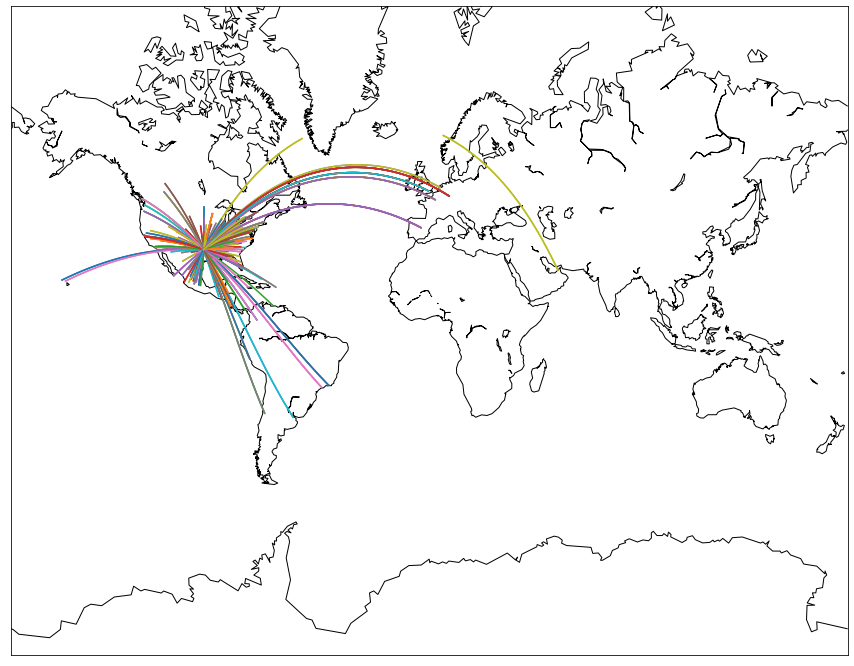

In [4]:
fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()

def create_great_circles(df):
    for index, row in df.iterrows():
        if abs(row['end_lat'] - row['start_lat']) < 180:
            if abs(row['end_lon'] - row['start_lon']) < 180:
                m.drawgreatcircle(row['start_lon'], row['start_lat'], row['end_lon'], row['end_lat'])

dfw = geo_routes[geo_routes['source'] == 'DFW']
create_great_circles(dfw)
plt.show()